<a href="https://colab.research.google.com/github/msammons82/googleStockAnalysis/blob/main/Google_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# Load and Explore the data

In [17]:
df =  yf.download('GOOG', start = '2000-01-01', end = '2022-04-12')

[*********************100%***********************]  1 of 1 completed


In [18]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-04-05,2867.989990,2871.800049,2818.870117,2821.260010,2821.260010,962800
2022-04-06,2783.229980,2796.969971,2728.362061,2743.520020,2743.520020,1178700
2022-04-07,2732.360107,2754.030029,2697.145020,2729.300049,2729.300049,972400


In [19]:
df['MA200'] = df['Adj Close'].rolling(window = 200).mean()

In [20]:
df['MA200'].dropna()

Date
2005-06-03      89.391339
2005-06-06      89.866060
2005-06-07      90.326359
2005-06-08      90.750171
2005-06-09      91.202077
                 ...     
2022-04-05    2781.387207
2022-04-06    2782.404857
2022-04-07    2783.405208
2022-04-08    2784.078058
2022-04-11    2784.358208
Name: MA200, Length: 4244, dtype: float64

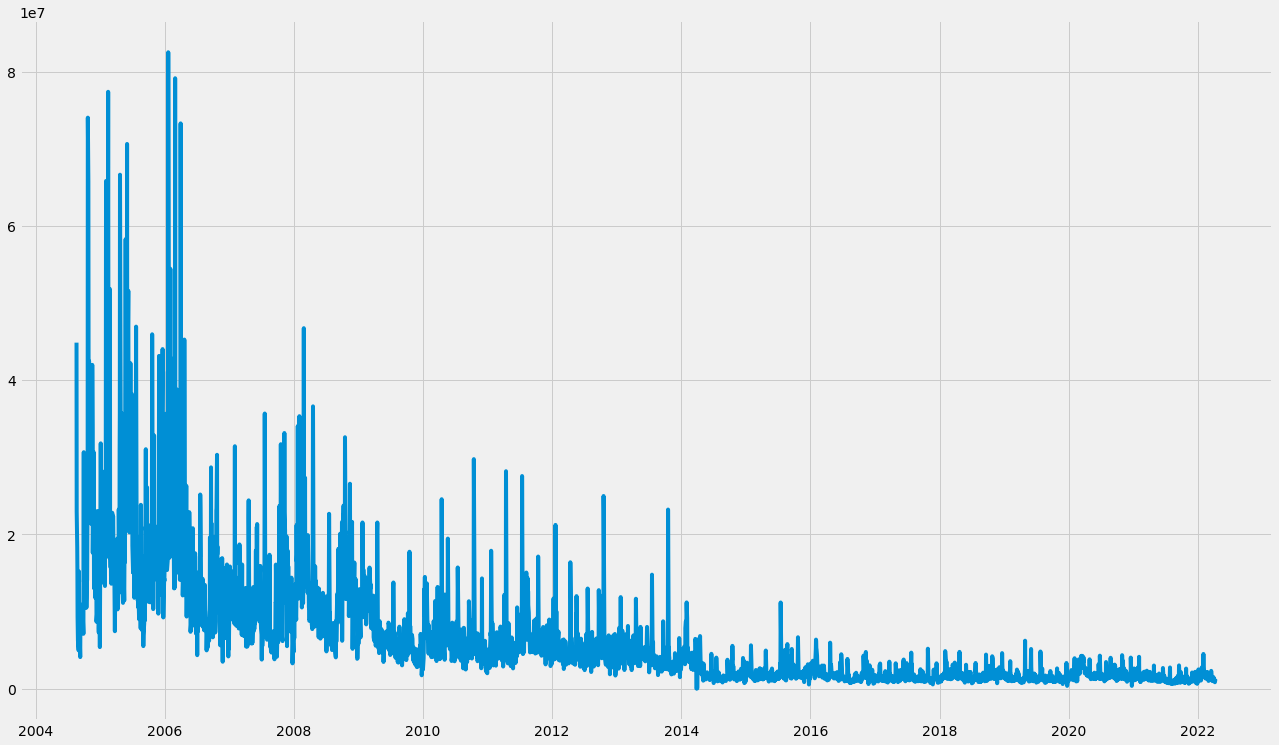

In [21]:
plt.figure(figsize=(20,12))
plt.plot(df['Volume'])

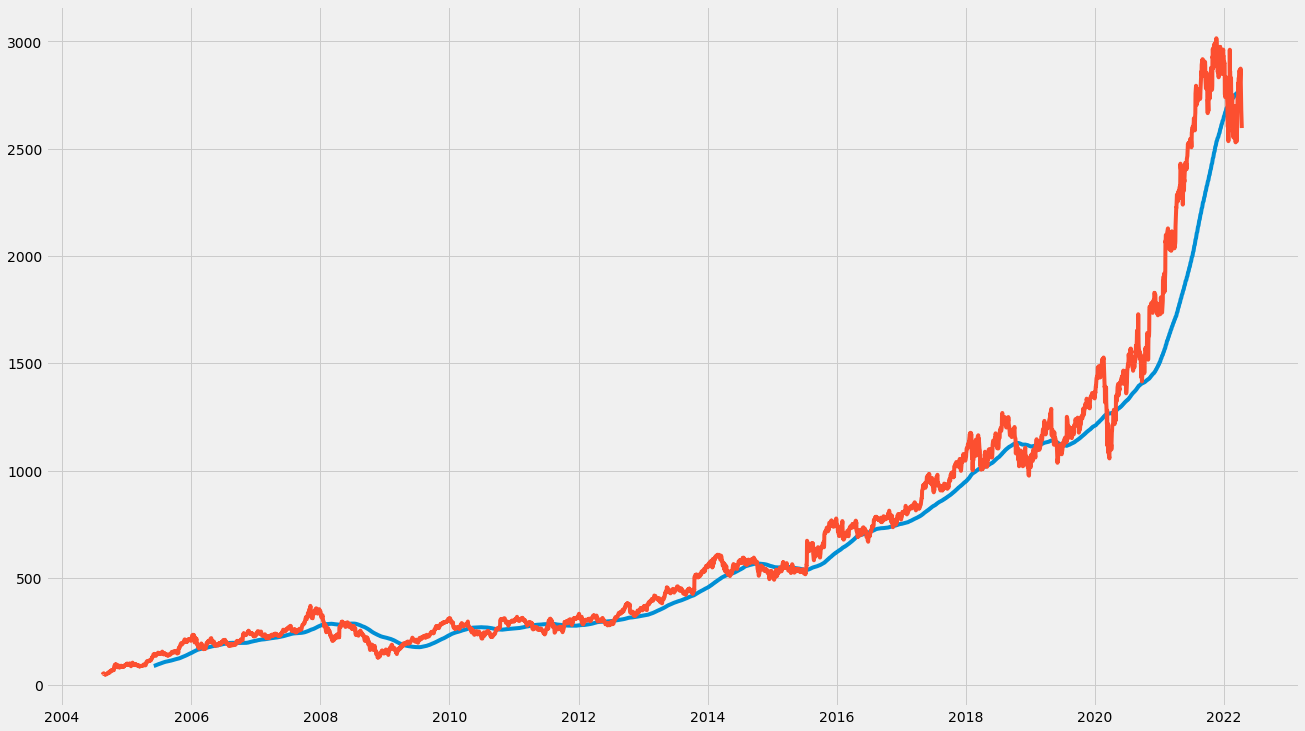

In [22]:
plt.figure(figsize=(20,12))
plt.plot(df['MA200'])
plt.plot(df['Close'])

plt.show()

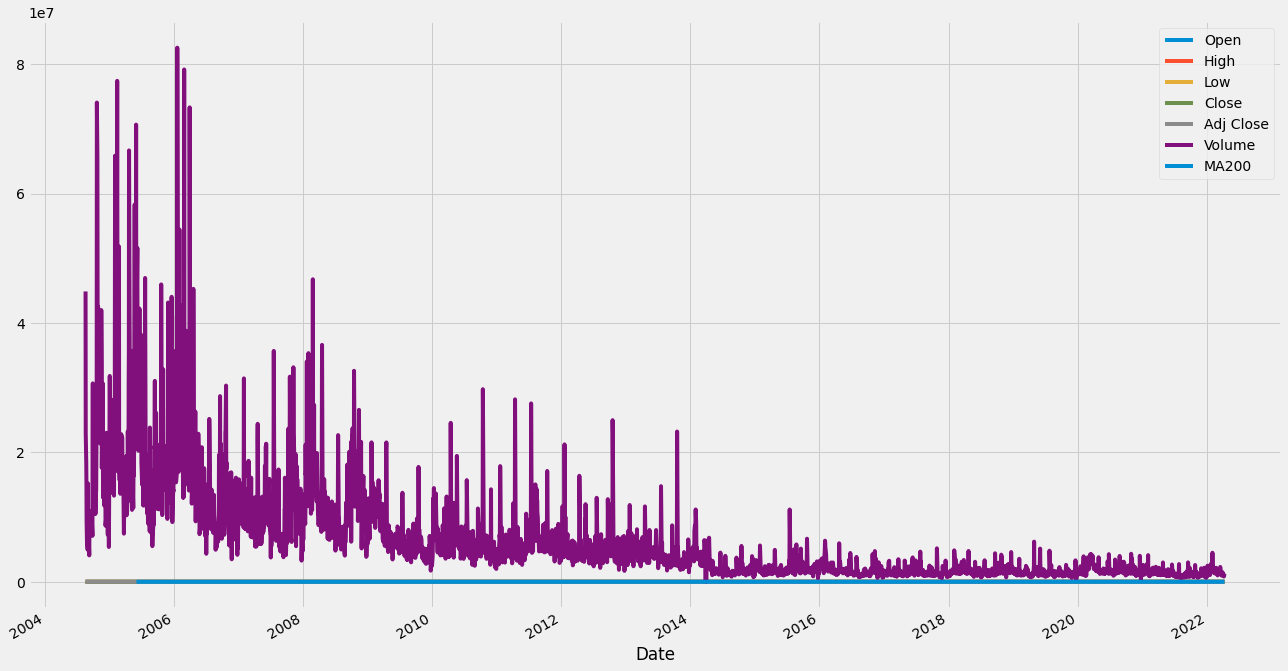

In [23]:
df.plot(figsize = (20,12))

Text(0.5, 1.0, 'Google MA200 and Close')

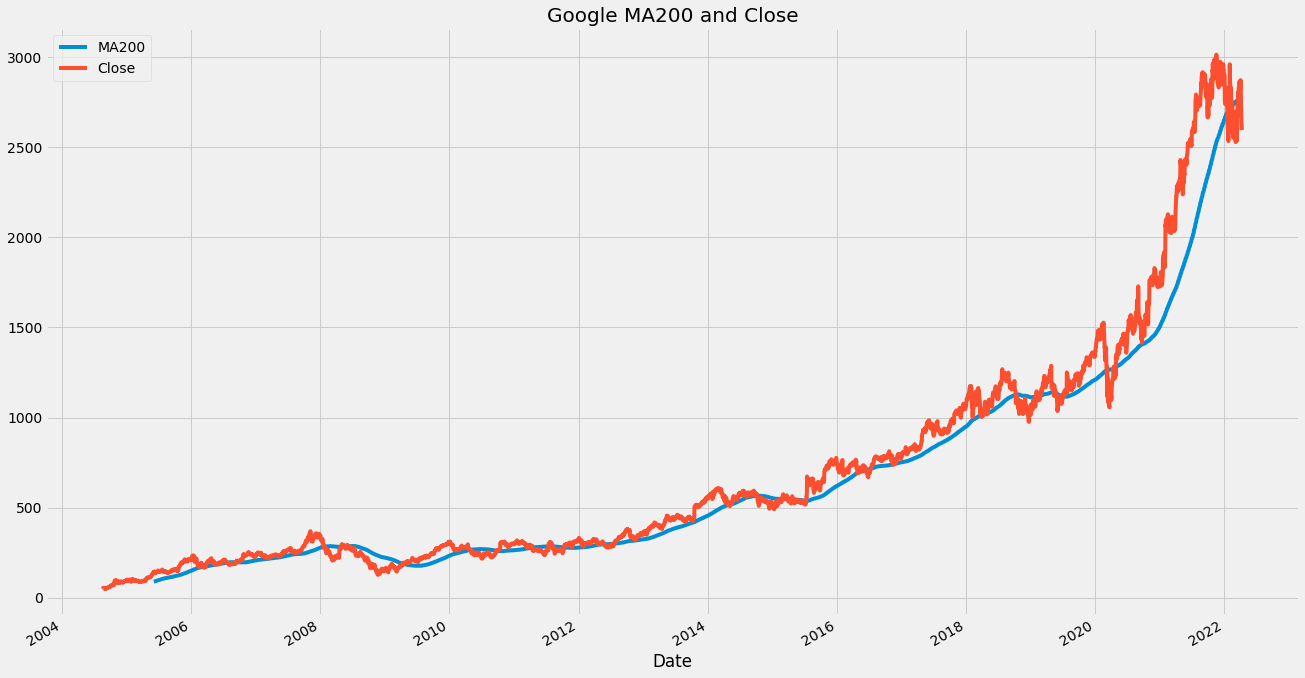

In [24]:
df[['MA200','Close']].plot(figsize =(20,12))
plt.title('Google MA200 and Close', fontsize = 20)

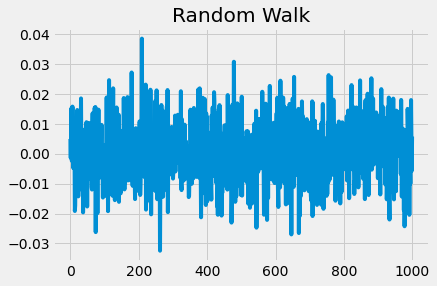

In [47]:
from numpy.random import normal, seed
seed(42)
random_walk = normal(loc=0, scale = 0.01, size = 1000)
plt.plot(random_walk)
plt.title('Random Walk')
plt.show()

In [48]:
goog_month = df.resample('M').mean()

# Seasonal Decompose

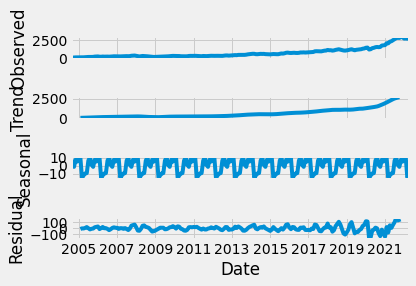

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(goog_month.Close, model='additive')
fig = decomposition.plot() 
plt.show()

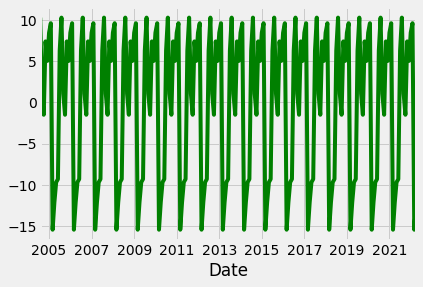

In [50]:
seasonality = decomposition.seasonal
seasonality.plot(color = 'green')

# Dickey-Fuller Test

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    2.915062
p-value                           1.000000
#Lags Used                       31.000000
Number of Observations Used    4411.000000
Critical Value (1%)              -3.431833
Critical Value (5%)              -2.862195
Critical Value (10%)             -2.567119
dtype: float64
None


In [27]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                   2.823245
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -4.259724
p-value                          0.000521
#Lags Used                      12.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64
None


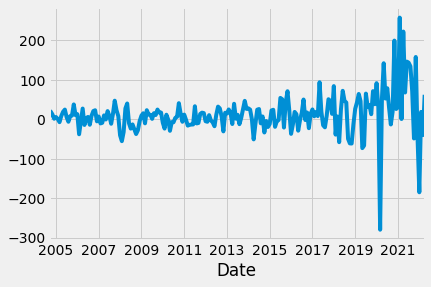

In [28]:
abc_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
abc_open_diff = abc_diff.dropna()
abc_open_diff.plot()

print(adf_test(abc_open_diff))

# KPSS

In [29]:
from statsmodels.tsa.stattools import kpss

In [30]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", lags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [31]:
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic            7.80135
p-value                   0.01000
Lags Used                41.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


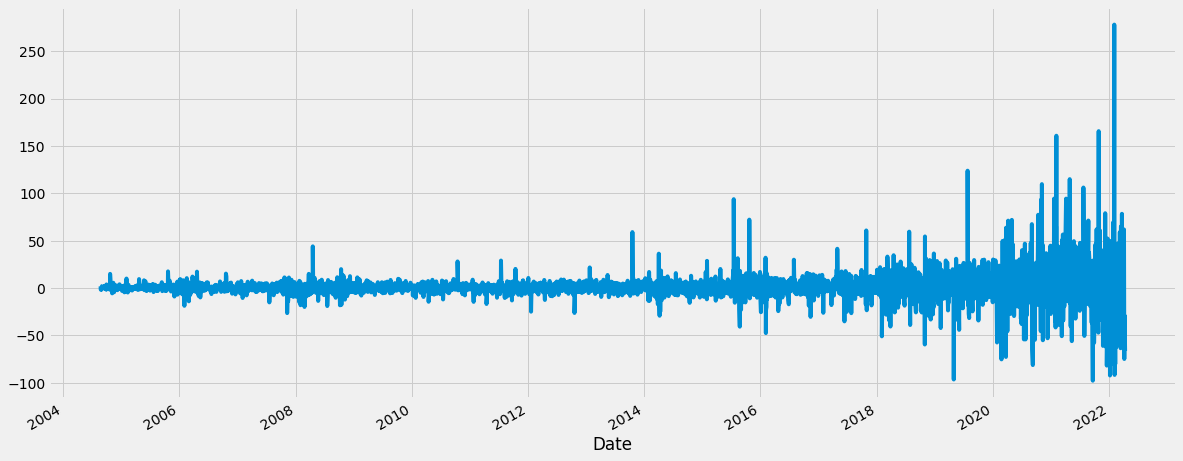

In [32]:
df['High_diff'] = df['High']- df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (18,8))

In [33]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.692974
p-value                   0.014184
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [34]:
kpss_test(df['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.242588
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


# Data Preprocessing

In [35]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [36]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

3552

# Sequential Model

In [37]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

In [38]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [39]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
45/45 - 3s - loss: 564092.1250 - 3s/epoch - 56ms/step
Epoch 2/10
45/45 - 0s - loss: 4867.1348 - 225ms/epoch - 5ms/step
Epoch 3/10
45/45 - 0s - loss: 328.1331 - 213ms/epoch - 5ms/step
Epoch 4/10
45/45 - 0s - loss: 256.6256 - 214ms/epoch - 5ms/step
Epoch 5/10
45/45 - 0s - loss: 252.8967 - 217ms/epoch - 5ms

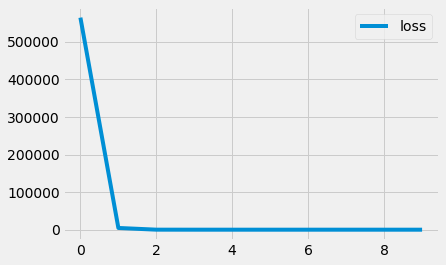

In [40]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [41]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [42]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

In [43]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 15.690941743416065
Validation rmse: 31.637388113190337


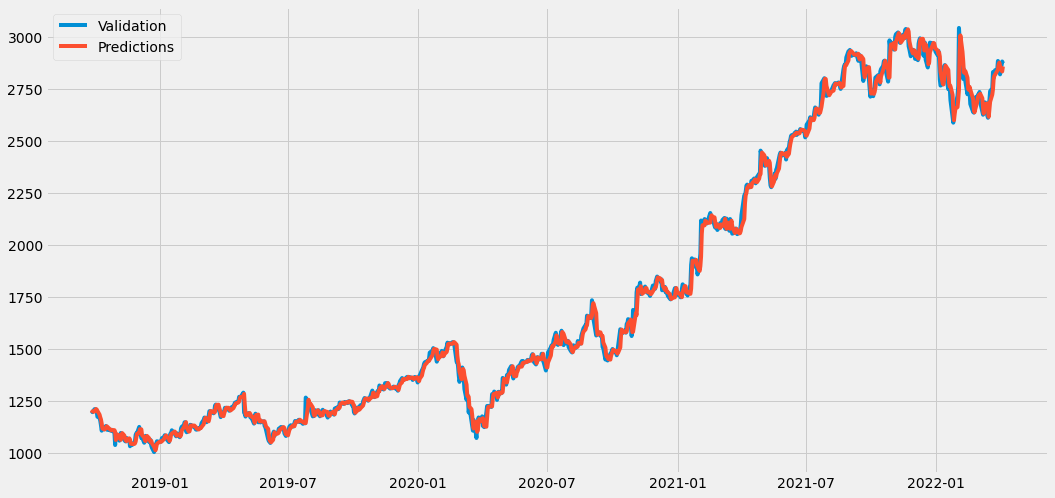

In [44]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [45]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,887.000000
mean,2.210721
std,31.577860
min,-115.581055
25%,-11.082886
50%,1.925415
75%,16.213135
max,296.352295


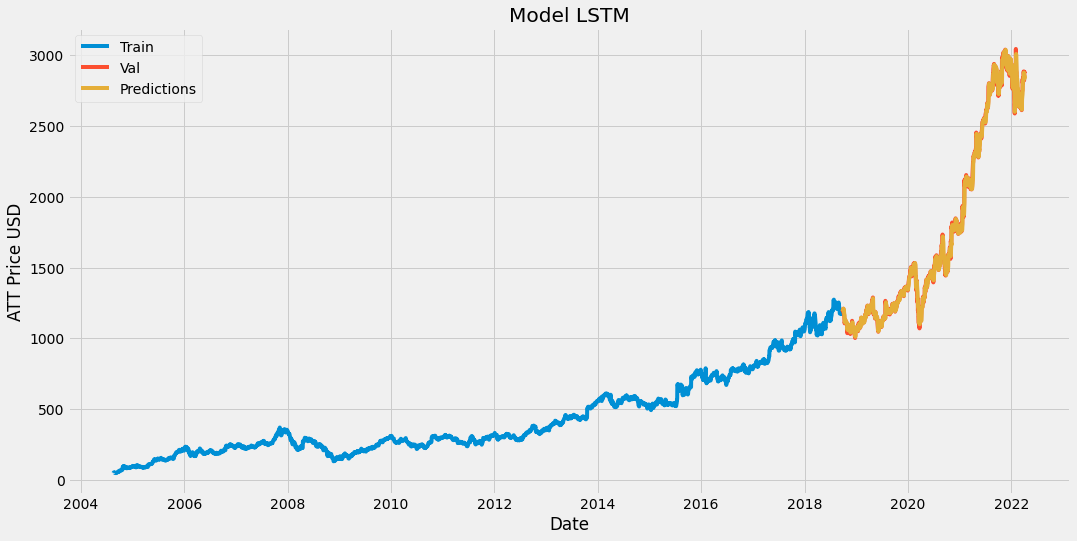

In [46]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('ATT Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()